# Purpose

Students have the option of using Pandas and SQL to complete this project. A Phase 1 project done completely in pandas, completely in SQL, or a mixture of the two can all be considered a fine Phase 1 project. This notebook serves as a resource for setting up an SQL database for students who wish to use SQL in their Phase 1 project.

**To create the `movies.db` database, run the code cells below.**
> The Entity Relational Diagram is below

In [2]:
from src.make_db import create_movies_db

In [3]:
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

![movies.db schema](images/movies_db_schema.png)

In [4]:
import sqlite3
import pandas as pd

conn = sqlite3.Connection('data/movies.db')
cur = conn.cursor()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

Bring in a new dataset with data about yearly box office income.

In [6]:
df2 = pd.read_csv('data/project_data.csv')
df2

,Year,Tickets Sold,Total Box Office,Total Inflation,Average
0,NaN,NaN,NaN,Adjusted Box Office,Ticket Price
1,2021.0,"182,519,895","$1,671,882,236","$1,671,882,236",$9.16
2,2020.0,"223,880,995","$2,050,751,679","$2,050,751,679",$9.16
3,2019.0,"1,228,763,381","$11,255,475,182","$11,255,475,286",$9.16
4,2018.0,"1,311,323,188","$11,946,156,764","$12,011,720,422",$9.11
5,2017.0,"1,225,639,761","$10,993,991,460","$11,226,860,216",$8.97
6,2016.0,"1,301,658,904","$11,259,352,764","$11,923,195,562",$8.65
7,2015.0,"1,323,267,005","$11,155,143,861","$12,121,125,772",$8.43
8,2014.0,"1,257,400,618","$10,272,966,196","$11,517,789,658",$8.17
9,2013.0,"1,339,168,926","$10,887,446,341","$12,266,787,382",$8.13


The cell below tells us what type of number our values are and tells us how many are in each column.

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              27 non-null     float64
 1   Tickets Sold      27 non-null     object 
 2   Total Box Office  27 non-null     object 
 3   Total Inflation   28 non-null     object 
 4   Average           27 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.2+ KB


The cell below allows us to drop all values in the data set that are in as null values and wont be useful to our data.

In [8]:
df2 = df2.dropna()
df2

,Year,Tickets Sold,Total Box Office,Total Inflation,Average
1,2021.0,"182,519,895","$1,671,882,236","$1,671,882,236",$9.16
2,2020.0,"223,880,995","$2,050,751,679","$2,050,751,679",$9.16
3,2019.0,"1,228,763,381","$11,255,475,182","$11,255,475,286",$9.16
4,2018.0,"1,311,323,188","$11,946,156,764","$12,011,720,422",$9.11
5,2017.0,"1,225,639,761","$10,993,991,460","$11,226,860,216",$8.97
6,2016.0,"1,301,658,904","$11,259,352,764","$11,923,195,562",$8.65
7,2015.0,"1,323,267,005","$11,155,143,861","$12,121,125,772",$8.43
8,2014.0,"1,257,400,618","$10,272,966,196","$11,517,789,658",$8.17
9,2013.0,"1,339,168,926","$10,887,446,341","$12,266,787,382",$8.13
10,2012.0,"1,380,916,164","$10,992,095,616","$12,649,192,060",$7.96


The cell below  allows us to drop columns that are not relevant toward out graphs, leaving only the year and tickets sold columns.

In [9]:
df2 = df2.drop(['Total Box Office', 'Total Inflation', 'Average',], axis = 1)

df2

,Year,Tickets Sold
1,2021.0,"182,519,895"
2,2020.0,"223,880,995"
3,2019.0,"1,228,763,381"
4,2018.0,"1,311,323,188"
5,2017.0,"1,225,639,761"
6,2016.0,"1,301,658,904"
7,2015.0,"1,323,267,005"
8,2014.0,"1,257,400,618"
9,2013.0,"1,339,168,926"
10,2012.0,"1,380,916,164"


In the cell below we are turning the data into integers instead of strings so that we can correctly organize our data.

In [10]:
df2['Tickets Sold'] = df2['Tickets Sold'].str.replace(',','').astype(int)
df2

,Year,Tickets Sold
1,2021.0,182519895
2,2020.0,223880995
3,2019.0,1228763381
4,2018.0,1311323188
5,2017.0,1225639761
6,2016.0,1301658904
7,2015.0,1323267005
8,2014.0,1257400618
9,2013.0,1339168926
10,2012.0,1380916164


In the cell below we are making sure that out data are in the correct data types, which they are because neither of them are strings.

In [11]:
df2.dtypes

Year            float64
Tickets Sold      int64
dtype: object

In the cell below we are organizing our data where the year column starts with the earliest year and the last row is the most recent year. 

In [12]:
df2 = df2.sort_values(['Year'], ascending=True)
df2

,Year,Tickets Sold
26,1996.0,1305216770
25,1997.0,1385218935
24,1998.0,1443827003
23,1999.0,1444664086
22,2000.0,1397460079
21,2001.0,1465874205
20,2002.0,1575756527
19,2003.0,1524585021
18,2004.0,1495651298
17,2005.0,1372980280


In the cell below we are creating the line plots displaying out data  and showing a steady decline in box office tickets sold since 2002.

Text(0, 0.5, 'Tickets Sold (in millions)')

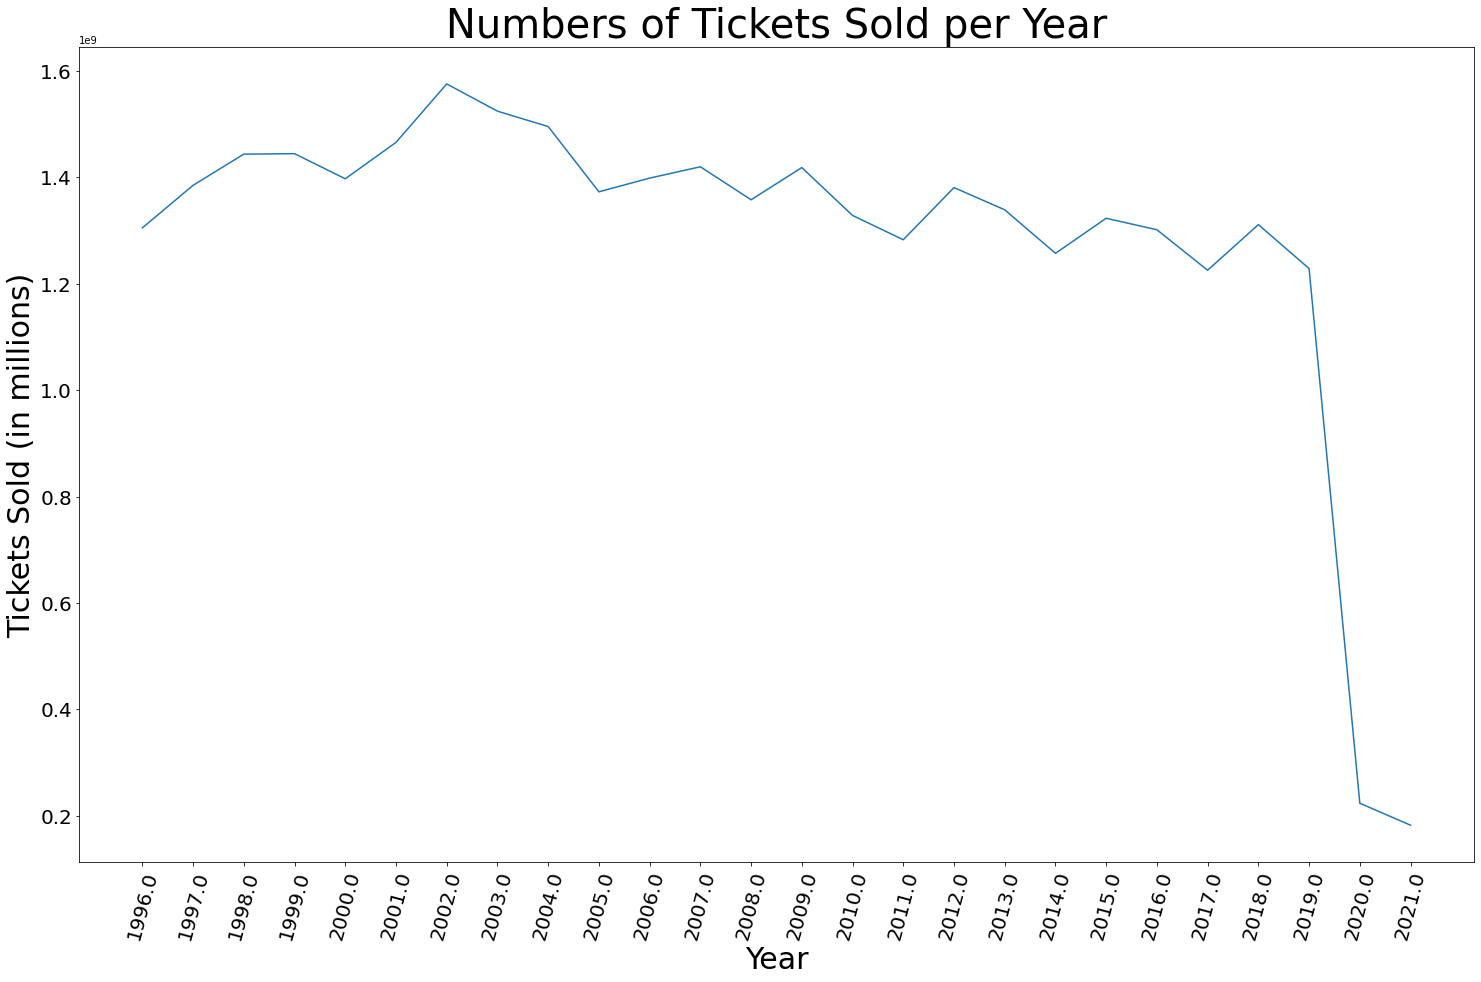

In [13]:
x = df2['Year'].astype(str)
y = df2['Tickets Sold'].values

plot_two_fig, plot_two_ax = plt.subplots(figsize=(25,15))
plot_two_ax.plot(x, y)

plot_two_ax.tick_params(axis='x', labelsize=20, rotation = 75)
plot_two_ax.tick_params(axis='y', labelsize=20)
plot_two_ax.set_title('Numbers of Tickets Sold per Year', fontsize=40)
plot_two_ax.set_xlabel('Year', fontsize=30)
plot_two_ax.set_ylabel('Tickets Sold (in millions)', fontsize=30)

In the cell below we are importing new data.

In [14]:
df3 = pd.read_csv('data/streaming_revenue.csv')
df3

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,Year,Subscriptions revenue in billions,NaN,NaN,NaN,NaN
1,NaN,2020,10.36,NaN,NaN,NaN,NaN
2,NaN,2019,9.74,NaN,NaN,NaN,NaN
3,NaN,2018,8.95,NaN,NaN,NaN,NaN
4,NaN,2017,8.17,NaN,NaN,NaN,NaN
5,NaN,2016,7.36,NaN,NaN,NaN,NaN
6,NaN,2015,6.41,NaN,NaN,NaN,NaN
7,NaN,2014,5.53,NaN,NaN,NaN,NaN
8,NaN,2013,4.6,NaN,NaN,NaN,NaN
9,NaN,2012,2.79,NaN,NaN,NaN,NaN


In the cell below we are dropping extra columns and columns that we do not need, leaving only Unnamed 1 and Unnamed 2.

In [15]:
df3 = df3.drop(['Unnamed: 0', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis=1)
df3


,Unnamed: 1,Unnamed: 2
0,Year,Subscriptions revenue in billions
1,2020,10.36
2,2019,9.74
3,2018,8.95
4,2017,8.17
5,2016,7.36
6,2015,6.41
7,2014,5.53
8,2013,4.6
9,2012,2.79


In the cell below we are dropping all null values and renaming each of the column names so that we can properly graph our data.

In [16]:
df3 = df3.dropna()
df3_renamed = df3.rename(columns={"Unnamed: 1": "Year", "Unnamed: 2": "Subscription revenue in billions"})
df3_renamed

,Year,Subscription revenue in billions
0,Year,Subscriptions revenue in billions
1,2020,10.36
2,2019,9.74
3,2018,8.95
4,2017,8.17
5,2016,7.36
6,2015,6.41
7,2014,5.53
8,2013,4.6
9,2012,2.79


In the cell below we are dropping the first row that does not contain any actual data so that it does not show up on the graph.

In [17]:
df3_renamed = df3_renamed.drop([0])
df3_renamed

,Year,Subscription revenue in billions
1,2020,10.36
2,2019,9.74
3,2018,8.95
4,2017,8.17
5,2016,7.36
6,2015,6.41
7,2014,5.53
8,2013,4.6
9,2012,2.79
10,2011,2.4


In the cell below we are organizing the data in the way we want it to be displayed in our graph, which is by year, going from the 2011 to 2020.

In [18]:
df3_renamed = df3_renamed.sort_values(['Year'], ascending=True)
df3_renamed


,Year,Subscription revenue in billions
10,2011,2.4
9,2012,2.79
8,2013,4.6
7,2014,5.53
6,2015,6.41
5,2016,7.36
4,2017,8.17
3,2018,8.95
2,2019,9.74
1,2020,10.36


In the cell below we are creating the bar graph for the data which shows a steady incline in money made from streaming services.

Text(0, 0.5, 'Revenue of Subscriptions (in billions)')

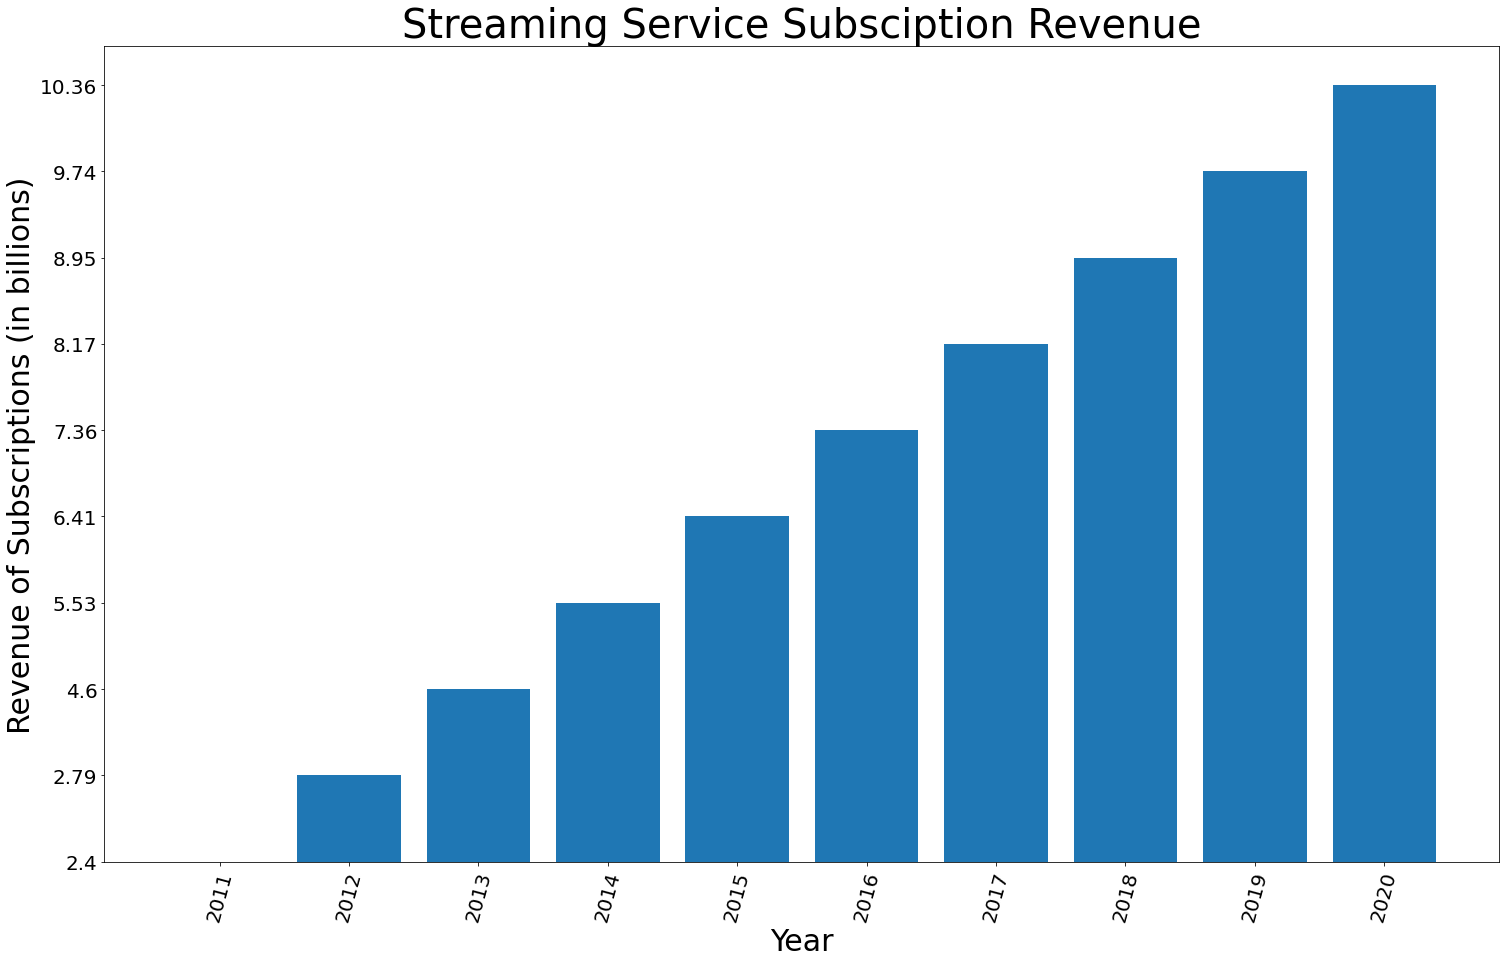

In [19]:
x = df3_renamed['Year'].astype(str)
y = df3_renamed['Subscription revenue in billions'].values

plot_three_fig, plot_three_ax = plt.subplots(figsize=(25,15))
plot_three_ax.bar(x, y)

plot_three_ax.tick_params(axis='x', labelsize=20, rotation = 75)
plot_three_ax.tick_params(axis='y', labelsize=20)
plot_three_ax.set_title('Streaming Service Subsciption Revenue', fontsize=40)
plot_three_ax.set_xlabel('Year', fontsize=30)
plot_three_ax.set_ylabel('Revenue of Subscriptions (in billions)', fontsize=30)

In the cell below  we are creating the line plot for the same data,  which also shows a steady incline in revenue from streaming services.

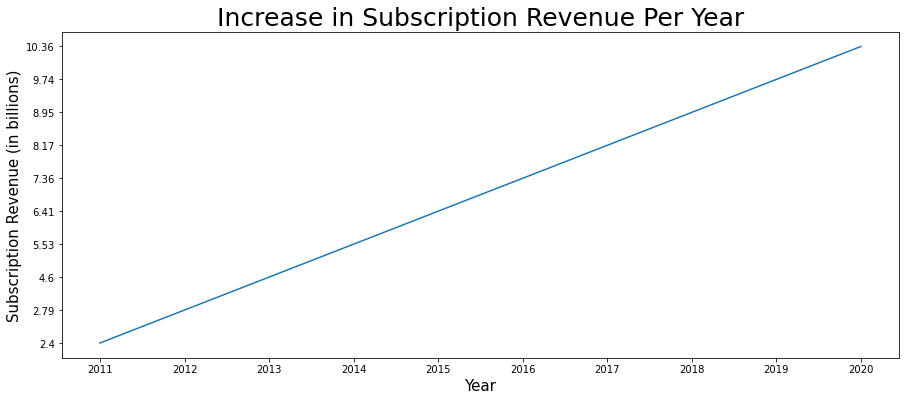

In [20]:

import matplotlib.pyplot as plt
import numpy as np
  
fig, ax = plt.subplots(figsize=(15,6))  
x = df3_renamed['Year'] 
y = df3_renamed['Subscription revenue in billions']
  
plt.plot(x, y)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Subscription Revenue (in billions)", fontsize=15)
plt.title("Increase in Subscription Revenue Per Year", fontsize=25)
plt.show()  

In the cell below we are importing a new dataset that gives us data about the number of subscribers per streaming services.

In [21]:
df4 = pd.read_csv('data/streaming_subscription_data.csv')
df4

Table 1
NaN Year Number of Netflix Subscribers Number of HBO Subscribers Number of Hulu Subscribers      NaN
    2013 31.71                         43                        4                               NaN
    2014 37.7                          46                        6                               NaN
    2015 43.4                          49                        10                              NaN
    2016 47.91                         49                        12                              NaN
    2017 52.81                         54                        17                              NaN
    2018 58.49                         50                        25                              NaN
    2019 61.04                         43                        28.5                            NaN
    2020 73.94                         41                        36.6                            NaN
    2021 74.38                         44.2                      41.6                            NaN
    NaN  NaN                           NaN                       NaN                             NaN
                                                                 NaN                             NaN
                                                                 NaN                             NaN
                                                                 NaN                             NaN
                                                                 NaN                             NaN
                                                                 NaN                             NaN
                                                                 NaN                             NaN
                                                                 NaN                             NaN
                                                                 NaN                             NaN
                                                                 NaN                             NaN
                                                                 NaN                             NaN

In the cell below we are dropping the column that has no data.

In [22]:
df4 = df4.drop(['Table 1'], axis=1)
df4

Empty DataFrame
Columns: []
Index: [(nan, Year, Number of Netflix Subscribers, Number of HBO Subscribers, Number of Hulu Subscribers), (nan, 2013, 31.71, 43, 4), (nan, 2014, 37.7, 46, 6), (nan, 2015, 43.4, 49, 10), (nan, 2016, 47.91, 49, 12), (nan, 2017, 52.81, 54, 17), (nan, 2018, 58.49, 50, 25), (nan, 2019, 61.04, 43, 28.5), (nan, 2020, 73.94, 41, 36.6), (nan, 2021, 74.38, 44.2, 41.6), (nan, nan, nan, nan, nan), (nan, nan, nan, nan, nan), (nan, nan, nan, nan, nan), (nan, nan, nan, nan, nan), (nan, nan, nan, nan, nan), (nan, nan, nan, nan, nan), (nan, nan, nan, nan, nan), (nan, nan, nan, nan, nan), (nan, nan, nan, nan, nan), (nan, nan, nan, nan, nan), (nan, nan, nan, nan, nan)]

In the cell below we are resetting the index to make the table look right.

In [23]:
df4 = df4.reset_index()

In [24]:
df4

,level_0,level_1,level_2,level_3,level_4
0,NaN,Year,Number of Netflix Subscribers,Number of HBO Subscribers,Number of Hulu Subscribers
1,NaN,2013,31.71,43,4
2,NaN,2014,37.7,46,6
3,NaN,2015,43.4,49,10
4,NaN,2016,47.91,49,12
5,NaN,2017,52.81,54,17
6,NaN,2018,58.49,50,25
7,NaN,2019,61.04,43,28.5
8,NaN,2020,73.94,41,36.6
9,NaN,2021,74.38,44.2,41.6


In the cell below we are dropping another column that does not contain data.

In [25]:
df4 = df4.drop(['level_0'], axis=1)
df4

,level_1,level_2,level_3,level_4
0,Year,Number of Netflix Subscribers,Number of HBO Subscribers,Number of Hulu Subscribers
1,2013,31.71,43,4
2,2014,37.7,46,6
3,2015,43.4,49,10
4,2016,47.91,49,12
5,2017,52.81,54,17
6,2018,58.49,50,25
7,2019,61.04,43,28.5
8,2020,73.94,41,36.6
9,2021,74.38,44.2,41.6


In the cells below we are making the column names by using .iloc

In [26]:
list(df4.iloc[0])

['Year',
 'Number of Netflix Subscribers',
 'Number of HBO Subscribers',
 'Number of Hulu Subscribers']

In [27]:
df4.columns = list(df4.iloc[0])

In [28]:
df4

,Year,Number of Netflix Subscribers,Number of HBO Subscribers,Number of Hulu Subscribers
0,Year,Number of Netflix Subscribers,Number of HBO Subscribers,Number of Hulu Subscribers
1,2013,31.71,43,4
2,2014,37.7,46,6
3,2015,43.4,49,10
4,2016,47.91,49,12
5,2017,52.81,54,17
6,2018,58.49,50,25
7,2019,61.04,43,28.5
8,2020,73.94,41,36.6
9,2021,74.38,44.2,41.6


In the cell below we are dropping the row that contains the column names.

In [29]:
df4 = df4.drop([0])
df4

,Year,Number of Netflix Subscribers,Number of HBO Subscribers,Number of Hulu Subscribers
1,2013,31.71,43,4
2,2014,37.7,46,6
3,2015,43.4,49,10
4,2016,47.91,49,12
5,2017,52.81,54,17
6,2018,58.49,50,25
7,2019,61.04,43,28.5
8,2020,73.94,41,36.6
9,2021,74.38,44.2,41.6
10,NaN,NaN,NaN,NaN


In the cell below we are dropping all null values, leaving us with only data we can use.

In [30]:
df4 = df4.dropna()
df4

,Year,Number of Netflix Subscribers,Number of HBO Subscribers,Number of Hulu Subscribers
1,2013,31.71,43,4
2,2014,37.7,46,6
3,2015,43.4,49,10
4,2016,47.91,49,12
5,2017,52.81,54,17
6,2018,58.49,50,25
7,2019,61.04,43,28.5
8,2020,73.94,41,36.6
9,2021,74.38,44.2,41.6


In the cell below we are changing the data from strings to floats so that the data can be made into a graph. 

In [31]:
df4 = df4.astype(float)
df4

,Year,Number of Netflix Subscribers,Number of HBO Subscribers,Number of Hulu Subscribers
1,2013.0,31.71,43.0,4.0
2,2014.0,37.70,46.0,6.0
3,2015.0,43.40,49.0,10.0
4,2016.0,47.91,49.0,12.0
5,2017.0,52.81,54.0,17.0
6,2018.0,58.49,50.0,25.0
7,2019.0,61.04,43.0,28.5
8,2020.0,73.94,41.0,36.6
9,2021.0,74.38,44.2,41.6


In the cell below we are making sure that our data is in the correct data type.

In [32]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 1 to 9
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           9 non-null      float64
 1   Number of Netflix Subscribers  9 non-null      float64
 2   Number of HBO Subscribers      9 non-null      float64
 3   Number of Hulu Subscribers     9 non-null      float64
dtypes: float64(4)
memory usage: 360.0 bytes


In the cell below we are creating a line plot for this data which displays that each streaming service has an increase in the number of subscribers since 2013, meaning microsoft should make their own streaming service instead of making a movie and putting it in theaters.

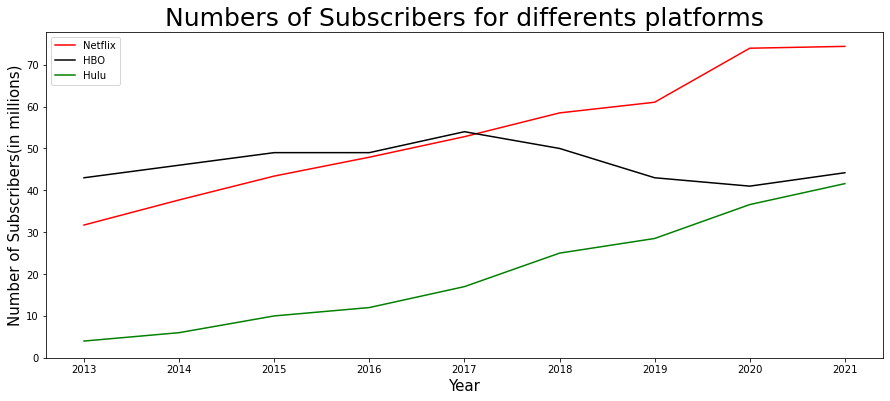

In [33]:

import matplotlib.pyplot as plt
import numpy as np
  
fig, ax = plt.subplots(figsize=(15,6))
x1 = df4['Year']
y1 = df4['Number of Netflix Subscribers']
plt.plot(x1, y1, label = "Netflix", color = 'red')
x2 = df4['Year']
y2 = df4['Number of HBO Subscribers']
plt.plot(x2, y2, label = "HBO", color = 'black')
x3 = df4['Year']
y3 = df4['Number of Hulu Subscribers']
plt.plot(x3, y3, label = "Hulu", color = 'green') 


plt.legend()

plt.xlabel("Year", fontsize=15)
plt.yticks(np.arange(0, 80, 10)) 
plt.ylabel("Number of Subscribers(in millions)", fontsize=15)
plt.title("Numbers of Subscribers for differents platforms", fontsize=25)
  

plt.show() 